In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

## Get reward csv files for liftcube

In [2]:
# function to read csv into pd dataframe


def read_csv(model, task, runs, epi_col):
    directory = Path.cwd().parents[0]
    training_location = 'training/'
    reward_dir = directory / model / training_location / task

    data = pd.DataFrame()
    for run in runs:
        run_dir = reward_dir / str(run)
        run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
        # remove episode number column
        print(run_data.columns)
        run_data = run_data.drop(columns=epi_col)
        # rename reward column to "model + run"
        run_data = run_data.rename(
            columns={' Episode reward': model + '_' + str(run)})
        # concat with data from other runs
        data = pd.concat([data, run_data], axis=1)
        # create another column for the average reward
        data[model + '_avg'] = data.mean(axis=1)

    return data

drq_v2

In [3]:
model = "drq_v2"
task = "liftcube"
runs = [1,2,3]

drq_data = read_csv(model, task, runs, 'Episode num')

print(drq_data)


Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
      drq_v2_1  drq_v2_avg    drq_v2_2    drq_v2_3
0    13.532847   16.980102   27.848417    8.234441
1    38.887274   33.366147   15.683807   47.740721
2    66.080704   34.992474    5.676842   22.266267
3    19.849569   38.847887   50.459935   55.029020
4    20.683733   22.218386   31.244524   12.741291
..         ...         ...         ...         ...
994        NaN  304.170574  387.144384  138.222954
995        NaN  389.667318  389.335035  390.331883
996        NaN  399.764236  407.862688  383.567332
997        NaN  271.668529  205.597956  403.809675
998        NaN  408.721356  407.946253  410.271562

[999 rows x 4 columns]


sac

In [4]:
model = "sac"
task = "liftcube"

runs = [1,2,3]

sac_data = read_csv(model, task, runs, 'Episode number')
        
print(sac_data)

Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
          sac_1     sac_avg       sac_2       sac_3
0     51.348833   49.383495   67.378905   22.114051
1     32.202548   32.257986   12.919892   58.134509
2     63.770441   38.539354   19.458883   21.928168
3     28.221083   23.606919    8.254587   36.386422
4     51.972439   49.003955   30.196239   69.133437
..          ...         ...         ...         ...
945  311.130232  335.341097  294.677730  429.910361
946  232.190932  266.631487  336.479762  230.901377
947  286.960427  364.194099  417.200630  422.241512
948  300.157018  292.570289  359.059533  191.273417
949  427.008404  425.841354  422.650482  428.150769

[950 rows x 4 columns]


coit

In [5]:
model = "coit"
task = "liftcube"
directory = Path.cwd().parents[0]
training_location = 'training/'
reward_dir = directory / model/ training_location/ task

runs = [1, 2, 3]
# runs = [1, 2]

coit_data = pd.DataFrame()
for run in runs:
    run_dir = reward_dir / str(run)
    run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    # run_data = pd.read_csv('coit_data.csv')
    print(run_data.columns)
    # remove episode number column
    run_data = run_data.drop(columns=['Episode num'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    coit_data = pd.concat([coit_data, run_data], axis=1)
    # create another column for the average reward
    coit_data[model + '_avg'] = coit_data.mean(axis=1)
        
print(coit_data)


Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
         coit_1    coit_avg      coit_2     coit_3
0     13.532847   16.980102   27.848417   8.234441
1     38.887274   33.366147   15.683807  47.740721
2     66.080704   34.992474    5.676842  22.266267
3     19.849569   38.847887   50.459935  55.029020
4     20.683733   22.218386   31.244524  12.741291
..          ...         ...         ...        ...
994   50.480640  217.494679  426.262229        NaN
995  193.346064  297.942826  428.688778        NaN
996  135.822333  101.015244   57.506381        NaN
997  142.952451   90.398916   24.706997        NaN
998  137.651267  263.400590  420.587243        NaN

[999 rows x 4 columns]


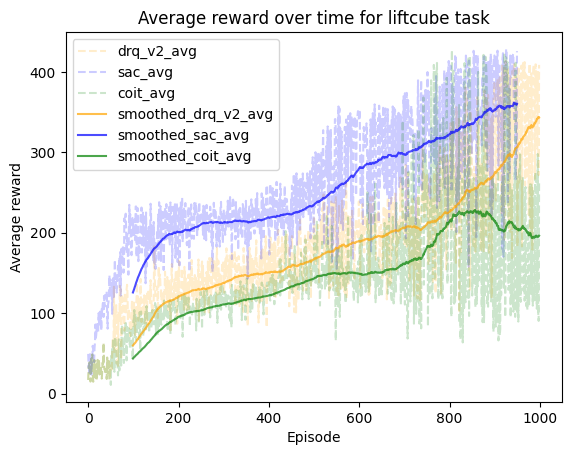

In [7]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for three models using dotted lines
colors = ['orange', 'blue', 'green']
ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', linestyle='--', alpha=0.2, color=colors[0])
ax.plot(sac_data['sac_avg'], label='sac_avg', linestyle='--', alpha=0.2, color = colors[1])
ax.plot(coit_data['coit_avg'], label='coit_avg', linestyle='--', alpha=0.2, color = colors[2])

# plot the smoothed average reward using moving average for three models using solid lines 
# also make sure the lines have matching colors
smoothed_drq = drq_data['drq_v2_avg'].rolling(100).mean()
smoothed_sac = sac_data['sac_avg'].rolling(100).mean()
smoothed_coit = coit_data['coit_avg'].rolling(100).mean()

ax.plot(smoothed_drq, label='smoothed_drq_v2_avg', color=colors[0], alpha=0.7, linestyle='-')
ax.plot(smoothed_sac, label='smoothed_sac_avg', color=colors[1], alpha=0.7, linestyle='-')
ax.plot(smoothed_coit, label='smoothed_coit_avg', color=colors[2], alpha=0.7, linestyle='-')

# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for liftcube task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('liftcube.png')

## Get reward csv files for stackcube

drq_v2

In [8]:
model = "drq_v2"
task = "stackcube"


runs = [1, 2, 3]
drq_data = read_csv(model, task, runs, 'Episode num')

print(drq_data)


Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
        drq_v2_1  drq_v2_avg    drq_v2_2    drq_v2_3
0     212.222144  229.456248  260.044503  217.395417
1     226.492097  234.031065  252.852598  221.500634
2     258.010680  241.385999  217.712271  245.243167
3     186.949488  208.935576  211.724050  241.861091
4     245.242071  257.795721  273.262736  258.095783
...          ...         ...         ...         ...
1088         NaN  280.595312         NaN  280.595312
1089         NaN  340.520162         NaN  340.520162
1090         NaN  339.631020         NaN  339.631020
1091         NaN  271.385523         NaN  271.385523
1092         NaN  290.960692         NaN  290.960692

[1093 rows x 4 columns]


sac

In [9]:
model = "sac"
task = "stackcube"

runs = [1, 2, 3]

sac_data = read_csv(model, task, runs, 'Episode number')
print(sac_data)


Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
            sac_1     sac_avg        sac_2       sac_3
0      219.691993  222.885592   215.714855  237.769242
1      237.161777  237.767244   238.908369  237.254853
2      267.446394  262.607885   286.033151  223.310018
3      260.834579  242.495022   221.920936  239.361209
4      254.033530  259.387834   253.061517  276.746764
...           ...         ...          ...         ...
1445   371.108674  332.739782   352.716960  242.155392
1446   218.775536  269.673359   303.810667  308.986653
1447   359.780056  399.825092   607.060705  190.252668
1448  1001.293078  814.538230  1011.409360  240.785308
1449   295.076347  306.097133   391.549968  210.527995

[1450 rows x 4 columns]


coit

In [11]:
model = "coit"
task = "stackcube"

runs = [1, 2, 3]

coit_data = read_csv(model, task, runs, 'Episode num')
        
print(coit_data)


Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
          coit_1    coit_avg      coit_2      coit_3
0     212.222144  229.456248  260.044503  217.395417
1     226.492097  234.031065  252.852598  221.500634
2     248.447022  237.401141  217.712271  245.243167
3     186.949407  211.481151  219.361466  241.860302
4     245.242071  257.795721  273.262736  258.095783
...          ...         ...         ...         ...
1494  285.249043  285.249043         NaN         NaN
1495  235.861657  235.861657         NaN         NaN
1496  355.254900  355.254900         NaN         NaN
1497  265.447538  265.447538         NaN         NaN
1498  244.762237  244.762237         NaN         NaN

[1499 rows x 4 columns]


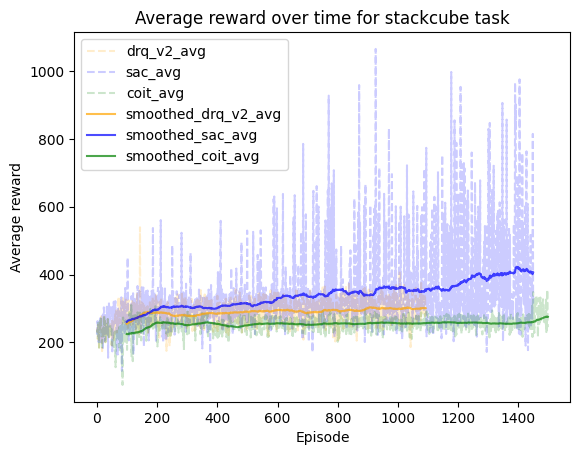

In [12]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for three models using dotted lines
colors = ['orange', 'blue', 'green']
ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', linestyle='--', alpha=0.2, color=colors[0])
ax.plot(sac_data['sac_avg'], label='sac_avg', linestyle='--', alpha=0.2, color = colors[1])
ax.plot(coit_data['coit_avg'], label='coit_avg', linestyle='--', alpha=0.2, color = colors[2])

# plot the smoothed average reward using moving average for three models using solid lines 
# also make sure the lines have matching colors
smoothed_drq = drq_data['drq_v2_avg'].rolling(100).mean()
smoothed_sac = sac_data['sac_avg'].rolling(100).mean()
smoothed_coit = coit_data['coit_avg'].rolling(100).mean()

ax.plot(smoothed_drq, label='smoothed_drq_v2_avg', color=colors[0], alpha=0.7, linestyle='-')
ax.plot(smoothed_sac, label='smoothed_sac_avg', color=colors[1], alpha=0.7, linestyle='-')
ax.plot(smoothed_coit, label='smoothed_coit_avg', color=colors[2], alpha=0.7, linestyle='-')

# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for stackcube task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('stackcube.png')

## Get reward csv files for turnfaucet

drq_v2

In [32]:
# model = "drq_v2"
# task = "turnfaucet-v1"
# directory = Path.cwd().parents[0]
# training_location = 'training/'
# reward_dir = directory / model / training_location / task

# runs = [1, 2, 3]
# drq_data = pd.DataFrame()
# for run in runs:
#     run_dir = reward_dir / str(run)
#     run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
#     # remove episode number column
#     print(run_data.columns)
#     run_data = run_data.drop(columns=['Episode num'])
#     # rename reward column to "model + run"
#     run_data = run_data.rename(
#         columns={' Episode reward': model + '_' + str(run)})
#     # concat with data from other runs
#     drq_data = pd.concat([drq_data, run_data], axis=1)
#     # create another column for the average reward
#     drq_data[model + '_avg'] = drq_data.mean(axis=1)

# print(drq_data)


sac

In [33]:
model = "sac"
task = "turnfaucet-v1"

# runs = [1, 2, 3]
runs = [1, 2]

sac_data = read_csv(model, task, runs, 'Episode number')

print(sac_data)


Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
           sac_1     sac_avg      sac_2
0       9.304157    9.149485   8.840142
1      27.304169   24.082478  17.639096
2      20.070293   15.121586   5.224172
3      81.605042   55.679870   3.829524
4      38.291705   29.827974  12.900511
...          ...         ...        ...
1445  278.289173  278.289173        NaN
1446  112.942110  112.942110        NaN
1447  467.081783  467.081783        NaN
1448  512.504241  512.504241        NaN
1449  115.175096  115.175096        NaN

[1450 rows x 3 columns]


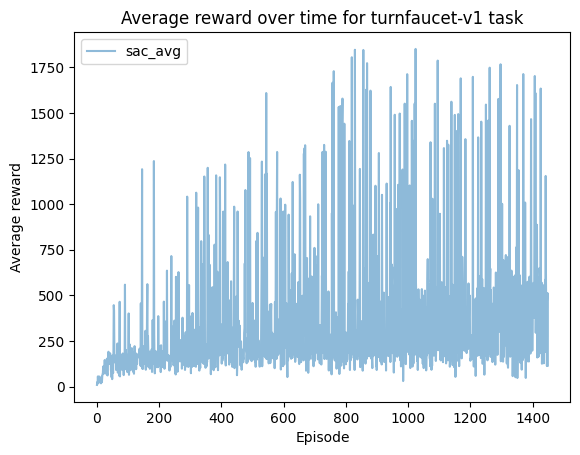

In [34]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
# ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for turnfaucet-v1 task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('turnfaucet-v1.png')

## Get reward csv files for peginsertion

drq_v2

In [35]:
# model = "drq_v2"
# task = "turnfaucet-v1"

# runs = [1, 2, 3]
# drq_data = read_csv(model, task, runs, 'Episode num')

# print(drq_data)


sac

In [36]:
model = "sac"
task = "peginsertion"
directory = Path.cwd().parents[0]
training_location = 'training/'
reward_dir = directory / model / training_location / task

runs = [1, 2, 3]
runs = [1]

sac_data = pd.DataFrame()
for run in runs:
    run_dir = reward_dir / str(run)
    run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    # remove episode number column
    run_data = run_data.drop(columns=['Episode number'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    sac_data = pd.concat([sac_data, run_data], axis=1)
    # create another column for the average reward
    sac_data[model + '_avg'] = sac_data.mean(axis=1)

print(sac_data)


            sac_1      sac_avg
0      215.862769   215.862769
1     -558.224552  -558.224552
2      -62.214873   -62.214873
3      217.485774   217.485774
4      226.379119   226.379119
...           ...          ...
2445  1163.212222  1163.212222
2446  1385.922608  1385.922608
2447  1259.217184  1259.217184
2448  1245.182785  1245.182785
2449  1213.368700  1213.368700

[2450 rows x 2 columns]


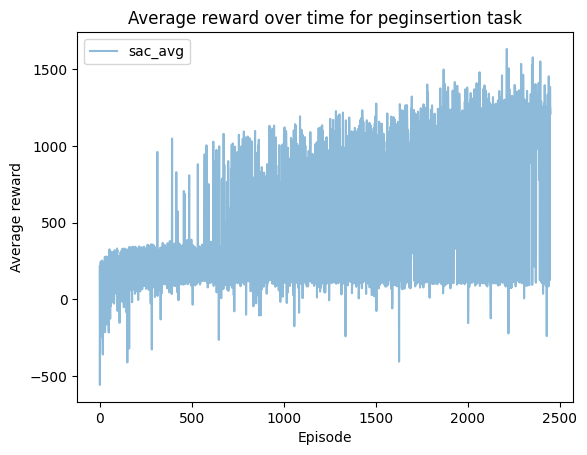

In [37]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
# ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for peginsertion task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('peginsertion.png')

## Get reward csv files for pushchair-v1

drq_v2

In [38]:
# model = "drq_v2"
# task = "pushchair-v1"

# runs = [1, 2, 3]
# drq_data = read_csv(model, task, runs, 'Episode num')

# print(drq_data)


sac

In [39]:
model = "sac"
task = "pushchair-v1"

runs = [1]

sac_data = read_csv(model, task, runs, 'Episode number')

print(sac_data)

Index(['Episode number', ' Episode reward'], dtype='object')
            sac_1      sac_avg
0    -2053.404709 -2053.404709
1    -2152.065097 -2152.065097
2    -2119.771392 -2119.771392
3    -2104.217990 -2104.217990
4    -2002.354495 -2002.354495
...           ...          ...
1359 -1269.853414 -1269.853414
1360 -1198.196435 -1198.196435
1361 -1155.468128 -1155.468128
1362 -1427.238187 -1427.238187
1363 -2088.424795 -2088.424795

[1364 rows x 2 columns]


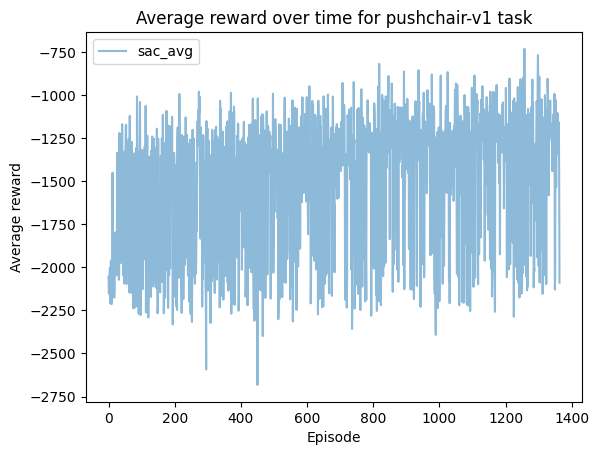

In [40]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
# ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for pushchair-v1 task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('pushchair-v1.png')